## Project 1: Deep Learning-Image Classification with CNN
## Team NeuFalcons
 - Mohammed Almatrafi
 - Yazeed Alghamdi
 - Yasser Alshehri

### Loading the data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train.reshape((50000,)) # convert to 1D array
y_test = y_test.reshape((10000,)) # convert to 1D array

### Exploratory Data Analysis

#### Preprocessing the data

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0 # Normalizing the data
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)


#### Visualising the data

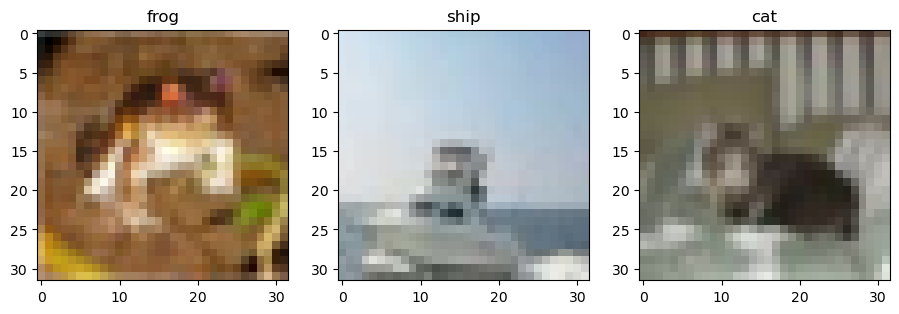

In [4]:
plt.figure(figsize=(11,10))
plt.subplot(1,3,1)
plt.imshow(x_train[0])
plt.title(class_names[y_train[0]])
plt.subplot(1,3,2)
plt.imshow(x_train[100])
plt.title(class_names[y_train[100]])
plt.subplot(1,3,3)
plt.imshow(x_train[150])
plt.title(class_names[y_train[150]])
plt.show()

### Building baseline CNN model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Convolutional Layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  # Max Pooling Layer
    tf.keras.layers.Flatten(),  # Flatten feature maps
    tf.keras.layers.Dense(100, activation='relu'),  # Dense Layer with 100 units
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ea= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(x_train, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.1, callbacks=[ea, mc])

Epoch 1/50
1401/1407 [============================>.] - ETA: 0s - loss: 1.5072 - accuracy: 0.4586
Epoch 1: val_accuracy improved from -inf to 0.53660, saving model to best_model.h5
1407/1407 [==============================] - 19s 13ms/step - loss: 1.5059 - accuracy: 0.4591 - val_loss: 1.3114 - val_accuracy: 0.5366
Epoch 2/50
1406/1407 [============================>.] - ETA: 0s - loss: 1.2081 - accuracy: 0.5763
Epoch 2: val_accuracy improved from 0.53660 to 0.58540, saving model to best_model.h5
1407/1407 [==============================] - 18s 13ms/step - loss: 1.2081 - accuracy: 0.5763 - val_loss: 1.1754 - val_accuracy: 0.5854
Epoch 3/50
1401/1407 [============================>.] - ETA: 0s - loss: 1.0875 - accuracy: 0.6216
Epoch 3: val_accuracy improved from 0.58540 to 0.59620, saving model to best_model.h5
1407/1407 [==============================] - 16s 11ms/step - loss: 1.0879 - accuracy: 0.6215 - val_loss: 1.1570 - val_accuracy: 0.5962
Epoch 4/50
1399/1407 [========================

#### Baseline Model Description

##### Layers
- Input Layer (32 x 32) RGB Image
- Hidden Layers
    - 1. Max Pooling Layer
    - 2. Flatten Layer
    - 3. Dense Layer with 100 units
- Output Layer (10) possible classes

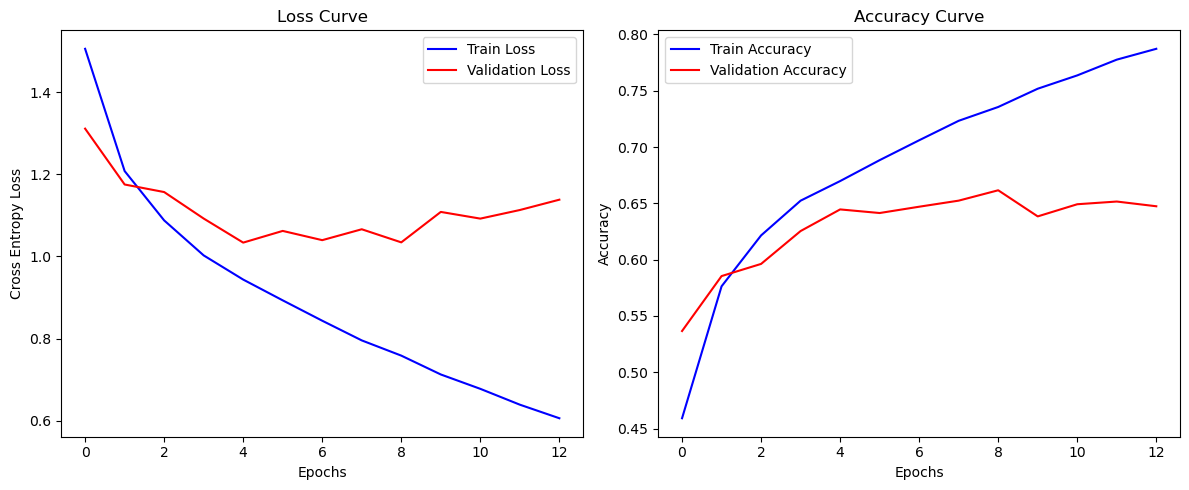

In [11]:
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss Curve')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

Model overfitting!!